In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
#from api_keys import api_key

# Import 2017 and 2009 dataframes
raw_2017 = pd.DataFrame(pd.read_csv("Cleaned_2017_data.csv"))
raw_2009 = pd.DataFrame(pd.read_csv("Cleaned_2009_data.csv"))
merged_df = raw_2017.merge(raw_2009[["UNITID", "GRAD_DEBT_MDN", "MD_EARN_WNE_P10"]], how="left", on = "UNITID")

In [151]:
#Remove non-4 year colleges
merged_df = merged_df.loc[merged_df["ICLEVEL"] == 1]
merged_df = merged_df.reset_index(drop=True)

#Convert PrivacySuppressed tags to NaN values
for index, row in merged_df.iterrows():
    column = 0
    for cell in row:
        if cell == "PrivacySuppressed":
            merged_df.iloc[index, column] = np.nan
        column += 1

#Convert the data columns to floats
for column in merged_df.columns[10:]:
    merged_df[column] = pd.to_numeric(merged_df[column])

In [152]:
# Remove all the rows with NaN for "Retention" and "Graduate Debt"
df = merged_df.dropna(axis=0, subset=["RET_FT4", "GRAD_DEBT_MDN_x"], inplace=False)
df1 = df.groupby(["CONTROL"])[["RET_FT4", "GRAD_DEBT_MDN_x"]].mean()

# Total institues in each category
df1["Count"] = df.groupby(["CONTROL"])["UNITID"].count()


# Give displayed data cleaner formatting
df1["RET_FT4"] = df1["RET_FT4"].map("{:.2%}".format)
df1["GRAD_DEBT_MDN_x"] = df1["GRAD_DEBT_MDN_x"].map("${:,.0f}".format)

# Convert to dataframe
df1 = pd.DataFrame(df1).reset_index()
del df1["CONTROL"]

# Rename Column and Index
df1.rename(columns={"RET_FT4":"Retention Rate", "GRAD_DEBT_MDN_x":"Median Debt"},
           index={0:"Public", 1:"Priv. NonProfit", 2:"Priv. ForProfit"},
           inplace=True) 

# Name index 
df1.index.rename('Control', inplace=True)

# Change column order
df1 = df1[["Count", "Median Debt", "Retention Rate"]]

In [153]:
# Remove all the rows with NaN for "Retention" and "Graduate Debt"
df = merged_df.dropna(axis=0, subset=["RET_FT4", "GRAD_DEBT_MDN_y"], inplace=False)
df2 = df.groupby(["CONTROL"])[["RET_FT4", "GRAD_DEBT_MDN_y"]].mean()

# Total institues in each category
df2["Count"] = df.groupby(["CONTROL"])["UNITID"].count()


# Give displayed data cleaner formatting
df2["RET_FT4"] = df2["RET_FT4"].map("{:.2%}".format)
df2["GRAD_DEBT_MDN_y"] = df2["GRAD_DEBT_MDN_y"].map("${:,.0f}".format)

# Convert to dataframe
df2 = pd.DataFrame(df2).reset_index()
del df2["CONTROL"]

# Rename Column and Index
df2.rename(columns={"RET_FT4":"Retention Rate", "GRAD_DEBT_MDN_y":"Median Debt"},
           index={0:"Public", 1:"Priv. NonProfit", 2:"Priv. ForProfit"},
           inplace=True) 

# Name index 
df2.index.rename('Control', inplace=True)

# Change column order
df2 = df2[["Count", "Median Debt", "Retention Rate"]]

In [7]:
# Create combined 2009 and 2017 summary
summary_data = df1.merge(df2,left_index=True,right_index=True,how="inner")
summary_data.rename(columns={"Count_x":"Count_2009",
                             "Median Debt_x":"Median Debt_2009",
                             "Retention Rate_x":"Retention Rate_2009",
                             "Count_y":"Count_2017",
                             "Median Debt_y":"Median Debt_2017",
                             "Retention Rate_y":"Retention Rate_2017"},
                    inplace="True")

summary_data

,Count_2009,Median Debt_2009,Retention Rate_2009,Count_2017,Median Debt_2017,Retention Rate_2017
Control,,,,,,
Public,615,"$20,903",74.63%,590,"$15,396",74.66%
Priv. NonProfit,1127,"$23,946",73.94%,1063,"$17,820",74.48%
Priv. ForProfit,261,"$25,938",54.44%,174,"$19,053",56.95%


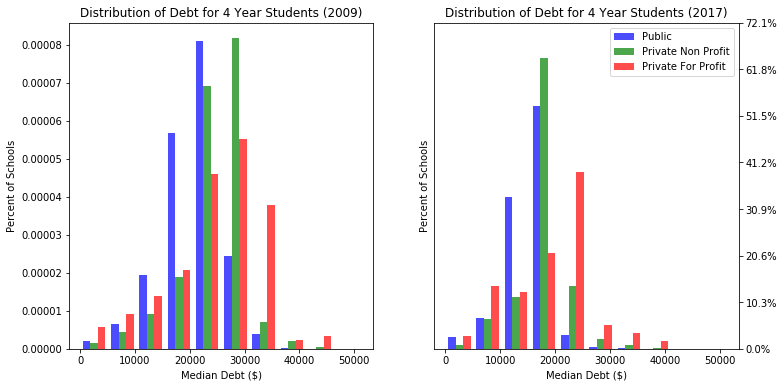

In [128]:
# Make a separate list for each institution type for 2009
x1 = list(df[df['CONTROL'] == 1]['GRAD_DEBT_MDN_x'])
x2 = list(df[df['CONTROL'] == 2]['GRAD_DEBT_MDN_x'])
x3 = list(df[df['CONTROL'] == 3]['GRAD_DEBT_MDN_x'])

# Make a separate list for each institution type for 2017
y1 = list(df[df['CONTROL'] == 1]['GRAD_DEBT_MDN_y'])
y2 = list(df[df['CONTROL'] == 2]['GRAD_DEBT_MDN_y'])
y3 = list(df[df['CONTROL'] == 3]['GRAD_DEBT_MDN_y'])

# Assign colors for each institution type and the names
colors = ['b', 'g', 'r']
names = ["Public", "Private Non Profit", "Private For Profit"]

# Multiple subplos with one figure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Define Bins
upper_limit = int(max(df['GRAD_DEBT_MDN_x']))
bin_width = upper_limit//10
bins = range(0, upper_limit, bin_width)

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
ax1.hist([x1, x2, x3], bins = bins, density=True, color = colors, label=names, alpha=0.7)
ax2.hist([y1, y2, y3], bins = bins, density=True, color = colors, label=names, alpha=0.7)


# Add labels to X and Y axes :: Add title
ax1.set_title("Distribution of Debt for 4 Year Students (2009)")
ax1.set_xlabel("Median Debt ($)")
ax1.set_ylabel("Percent of Schools")
ax1.yaxis.tick_left()

# Add labels to X and Y axes :: Add title
ax2.set_title("Distribution of Debt for 4 Year Students (2017)")
ax2.set_xlabel("Median Debt ($)")
ax2.set_ylabel("Percent of Schools")
ax2.yaxis.tick_right()

locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Plot formatting
plt.legend()

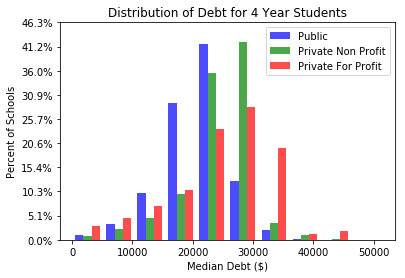

In [126]:
##REMOVE

# Make a separate list for each institution type
x1 = list(df[df['CONTROL'] == 1]['GRAD_DEBT_MDN_x'])
x2 = list(df[df['CONTROL'] == 2]['GRAD_DEBT_MDN_x'])
x3 = list(df[df['CONTROL'] == 3]['GRAD_DEBT_MDN_x'])

upper_limit = int(max(df['GRAD_DEBT_MDN_x']))
bin_width = upper_limit//10
bins = range(0, upper_limit, bin_width)
         
# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([x1, x2, x3], bins = bins, density=True, color = colors, label=names, alpha =0.7)

# Add labels to X and Y axes :: Add title
plt.title("Distribution of Debt for 4 Year Students")
plt.xlabel("Median Debt ($)")
plt.ylabel("Percent of Schools")

locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)


# Plot formatting
plt.legend()

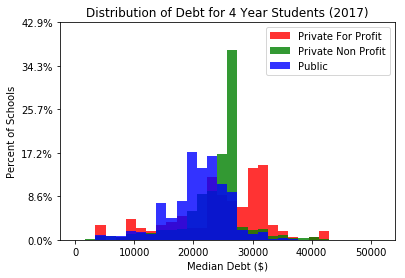

In [131]:
# Setpefilled histogram

# Define Bins
upper_limit = int(max(df['GRAD_DEBT_MDN_x']))
bin_width = upper_limit//30
bins = range(0, upper_limit, bin_width)

# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3], histtype="stepfilled", bins = bins, density=True, color = colors, label=names, alpha=0.8)

# Add labels to X and Y axes :: Add title
plt.title("Distribution of Debt for 4 Year Students (2017)")
plt.xlabel("Median Debt ($)")
plt.ylabel("Percent of Schools")

# Convert y-axis from normalized units to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Plot formatting
plt.legend()

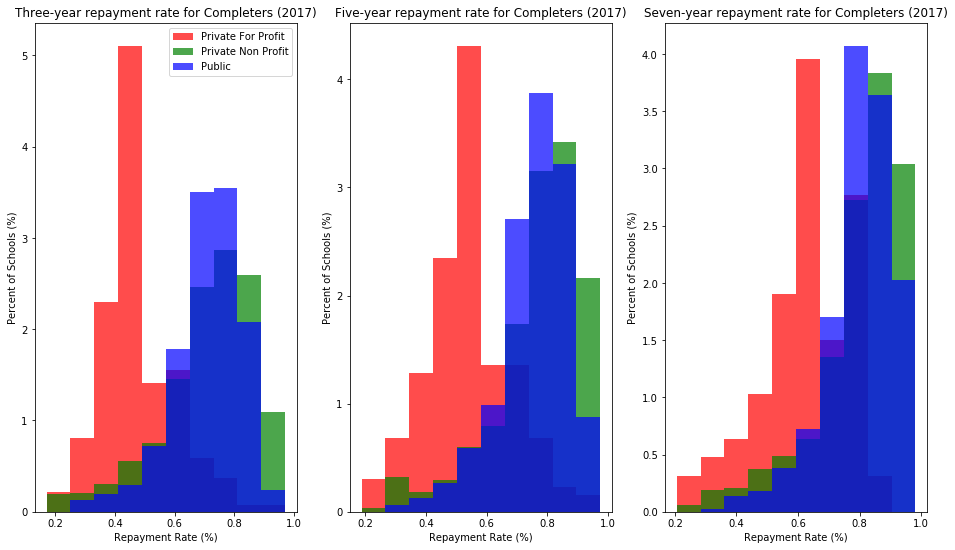

In [53]:
# Make a separate list for each institution type for 3-year repayment 
x1 = list(df[df['CONTROL'] == 1]['COMPL_RPY_3YR_RT'])
x2 = list(df[df['CONTROL'] == 2]['COMPL_RPY_3YR_RT'])
x3 = list(df[df['CONTROL'] == 3]['COMPL_RPY_3YR_RT'])

# Make a separate list for each institution type for 3-year repayment
y1 = list(df[df['CONTROL'] == 1]['COMPL_RPY_5YR_RT'])
y2 = list(df[df['CONTROL'] == 2]['COMPL_RPY_5YR_RT'])
y3 = list(df[df['CONTROL'] == 3]['COMPL_RPY_5YR_RT'])

# Make a separate list for each institution type for 3-year repayment
z1 = list(df[df['CONTROL'] == 1]['COMPL_RPY_7YR_RT'])
z2 = list(df[df['CONTROL'] == 2]['COMPL_RPY_7YR_RT'])
z3 = list(df[df['CONTROL'] == 3]['COMPL_RPY_7YR_RT'])

# Multiple subplos with one figure
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
ax1.hist([x1, x2, x3], histtype="stepfilled", bins = int(10), density=True, color = colors, label=names, alpha =0.7)
ax2.hist([y1, y2, y3], histtype="stepfilled", bins = int(10), density=True, color = colors, label=names, alpha =0.7)
ax3.hist([z1, z2, z3], histtype="stepfilled", bins = int(10), density=True, color = colors, label=names, alpha =0.7)

# Add labels to X and Y axes :: Add title
ax1.set_title("Three-year repayment rate for Completers (2017)")
ax1.set_xlabel("Repayment Rate (%)")
ax1.set_ylabel("Percent of Schools (%)")

# Add labels to X and Y axes :: Add title
ax2.set_title("Five-year repayment rate for Completers (2017)")
ax2.set_xlabel("Repayment Rate (%)")
ax2.set_ylabel("Percent of Schools (%)")

# Add labels to X and Y axes :: Add title
ax3.set_title("Seven-year repayment rate for Completers (2017)")
ax3.set_xlabel("Repayment Rate (%)")
ax3.set_ylabel("Percent of Schools (%)")

# Plot formatting
ax1.legend(loc="upper right")


In [18]:
#Create a smaller sample to test with
test_df = merged_df.sample(n=1000)
test_df = test_df.reset_index()

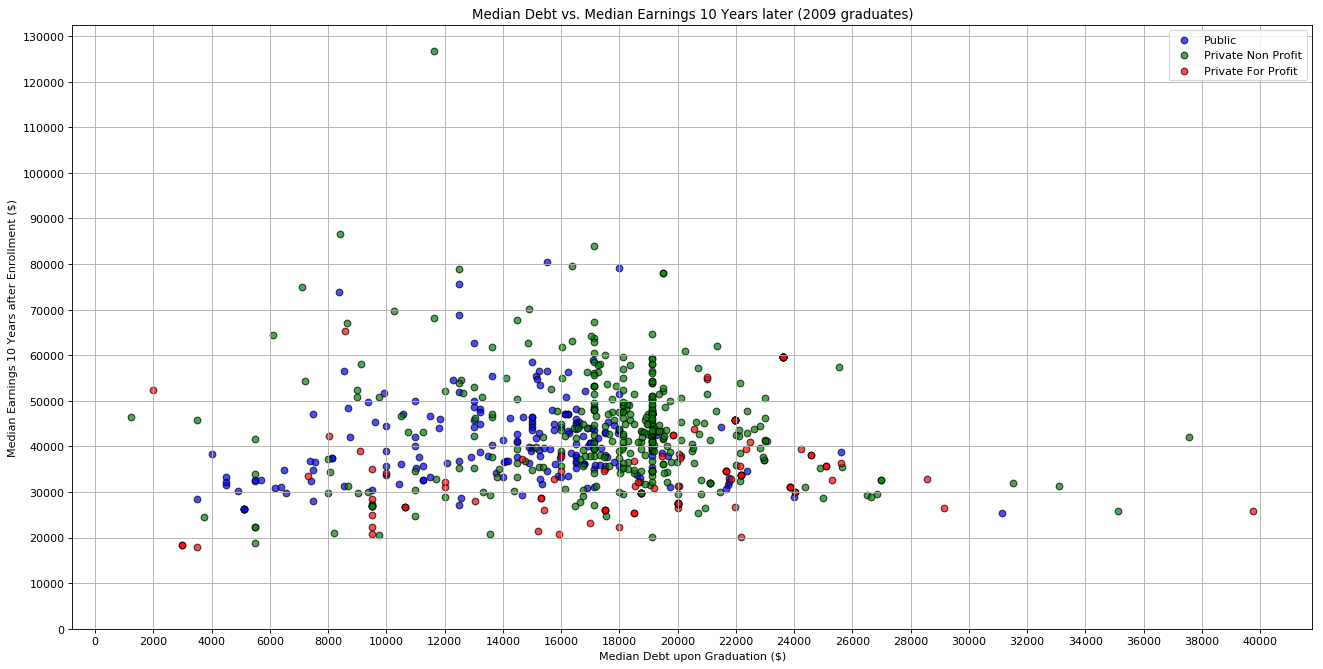

In [33]:
public_df = test_df.loc[test_df["CONTROL"]==1]
nonprofit_df = test_df.loc[test_df["CONTROL"]==2]
forprofit_df = test_df.loc[test_df["CONTROL"]==3]

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(public_df["GRAD_DEBT_MDN_y"], public_df["MD_EARN_WNE_P10"], 
           label=names[0], color=colors[0], edgecolors="k", alpha=0.7)
plt.scatter(nonprofit_df["GRAD_DEBT_MDN_y"], nonprofit_df["MD_EARN_WNE_P10"],
           label=names[1], color=colors[1], edgecolors="k", alpha=0.7)
plt.scatter(forprofit_df["GRAD_DEBT_MDN_y"], forprofit_df["MD_EARN_WNE_P10"],
           label=names[2], color=colors[2], edgecolors="k", alpha=0.7)
plt.xticks(np.arange(0, max(test_df["GRAD_DEBT_MDN_y"]) + 500, 2000))
plt.yticks(np.arange(0, max(test_df["MD_EARN_WNE_P10"]) + 5000, 10000))
plt.ylabel("Median Earnings 10 Years after Enrollment ($)")
plt.xlabel("Median Debt upon Graduation ($)")
plt.title("Median Debt vs. Median Earnings 10 Years later (2009 graduates)")
plt.grid()
plt.legend()

In [57]:
df1 = df.groupby(["CONTROL"]).agg({"RET_FT4":"describe",
                                   "GRAD_DEBT_MDN_y":"describe"
                                  })
df1

RET_FT4                                                                \
          count      mean       std  min       25%      50%       75%     max   
CONTROL                                                                         
1         590.0  0.746623  0.113337  0.0  0.684375  0.75000  0.825475  0.9734   
2        1063.0  0.744762  0.147815  0.0  0.666700  0.76630  0.845950  1.0000   
3         174.0  0.569523  0.255303  0.0  0.422975  0.56865  0.754200  1.0000   

        GRAD_DEBT_MDN_y                                                \
                  count          mean          std     min        25%   
CONTROL                                                                 
1                 590.0  15395.943220  3642.308265  3500.0  13917.125   
2                1063.0  17819.840075  4413.684809  3175.0  16634.500   
3                 174.0  19052.574713  7186.224718  2000.0  14907.500   

                                       
              50%        75%      max  
CONTROL                                
1        15997.25  17464.125  31135.0  
2        18375.00  19500.000  37542.0  
3        20437.50  23187.250  39756.0

In [134]:
df.columns

Index(['UNITID', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'MAIN', 'ICLEVEL',
       'CONTROL', 'REGION', 'LOCALE', 'LATITUDE', 'LONGITUDE', 'ADM_RATE',
       'NPT4_PUB', 'NPT4_PRIV', 'COSTT4_A', 'COSTT4_P', 'RET_FT4',
       'COMPL_RPY_3YR_RT', 'COMPL_RPY_5YR_RT', 'COMPL_RPY_7YR_RT',
       'GRAD_DEBT_MDN_x', 'GRAD_DEBT_MDN_y', 'MD_EARN_WNE_P10'],
      dtype='object')

In [194]:
import gmaps
import gmaps.datasets
from config import gkey
import pandas as pd

# Configure gmaps
gmaps.configure(api_key=gkey)


# Store latitude and longitude in locations
heatmap_df = merged_df.loc[merged_df["CONTROL"]==1][["LATITUDE", "LONGITUDE", "GRAD_DEBT_MDN_y"]]
heatmap_df = heatmap_df.dropna()
heatmap_df = heatmap_df.sort_values("GRAD_DEBT_MDN_y", ascending=False).head(20)

In [199]:
locations = heatmap_df[["LATITUDE", "LONGITUDE"]]
weights = heatmap_df["GRAD_DEBT_MDN_y"]

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
#heat_layer = gmaps.heatmap_layer(locations, weights=weights, 
#                                 dissipating=False, point_radius=1)

markers = gmaps.marker_layer(locations, hover_text="hover_text")

# Add layer
fig.add_layer(markers)


# Display figure
fig

Figure(layout=FigureLayout(height='420px'))